In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
insp = inspect(engine)
columns = insp.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Find the most recent date in the data set
session.query(func.max(measurement.date)).all()


[('2017-08-23',)]

In [11]:
session.query(measurement.date,measurement.prcp).filter(measurement.date > '2016-08-23').count()

2223

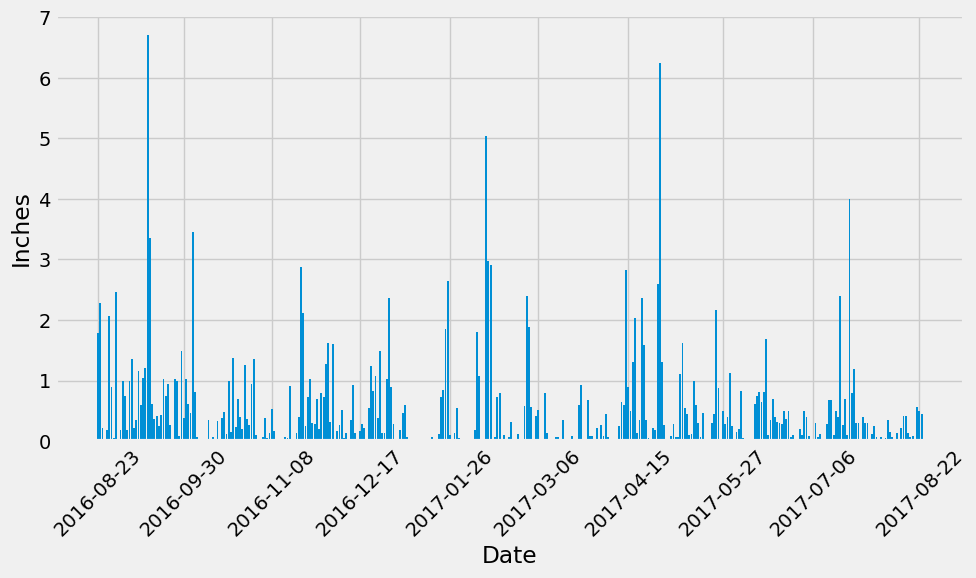

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_year_data = session.query(measurement.date,measurement.prcp).filter(measurement.date >= '2016-08-23').order_by(measurement.date).all()
last_year_data
# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(last_year_data, columns = ['Date','Precipitation'])
precipitation_df



# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10,6))
plt.bar(precipitation_df['Date'],precipitation_df['Precipitation'])
plt.xlabel('Date')
x_labels = precipitation_df['Date']
num_labels = 9
step = max(len(x_labels) // num_labels,1)
plt.xticks(x_labels[::step], rotation=45)
plt.ylabel('Inches')
plt.tight_layout()
plt.show()

In [13]:
precipitation_df

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
statistics_summary = precipitation_df.describe()
statistics_summary

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:

columns = insp.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [16]:
# Design a query to calculate the total number of stations in the dataset
session.query(station).count()

9

In [17]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
most_active_stations =session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).all()

# List the stations and their counts in descending order.
most_active_stations_sorted =  sorted(most_active_stations, key=lambda x: x[1], reverse=True)
most_active_stations_sorted

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = most_active_stations_sorted[0][0]

most_active_station_temp = session.query(measurement.tobs,measurement.date).filter(measurement.station == most_active_station).all()

most_active_station_temps = [temp[0] for temp in most_active_station_temp]
most_active_station_dates = [date[1] for date in most_active_station_temp]

import numpy as np
lowest_temp = min(most_active_station_temps)
highest_temp = max(most_active_station_temps)
average_temp = np.mean(most_active_station_temps)
print(f"{lowest_temp}, {highest_temp}, {average_temp}")


54.0, 85.0, 71.66378066378067


In [19]:
most_active_station_temp

[(70.0, '2010-01-01'),
 (62.0, '2010-01-02'),
 (74.0, '2010-01-03'),
 (75.0, '2010-01-04'),
 (74.0, '2010-01-05'),
 (76.0, '2010-01-06'),
 (69.0, '2010-01-07'),
 (66.0, '2010-01-08'),
 (70.0, '2010-01-09'),
 (75.0, '2010-01-10'),
 (64.0, '2010-01-11'),
 (60.0, '2010-01-12'),
 (61.0, '2010-01-13'),
 (68.0, '2010-01-14'),
 (64.0, '2010-01-15'),
 (66.0, '2010-01-16'),
 (67.0, '2010-01-17'),
 (70.0, '2010-01-18'),
 (67.0, '2010-01-19'),
 (67.0, '2010-01-20'),
 (69.0, '2010-01-21'),
 (60.0, '2010-01-22'),
 (75.0, '2010-01-23'),
 (75.0, '2010-01-24'),
 (65.0, '2010-01-25'),
 (75.0, '2010-01-26'),
 (69.0, '2010-01-27'),
 (67.0, '2010-01-28'),
 (66.0, '2010-01-29'),
 (69.0, '2010-01-30'),
 (72.0, '2010-01-31'),
 (67.0, '2010-02-01'),
 (65.0, '2010-02-02'),
 (64.0, '2010-02-03'),
 (67.0, '2010-02-04'),
 (67.0, '2010-02-05'),
 (68.0, '2010-02-06'),
 (69.0, '2010-02-07'),
 (66.0, '2010-02-08'),
 (69.0, '2010-02-09'),
 (61.0, '2010-02-10'),
 (71.0, '2010-02-11'),
 (70.0, '2010-02-12'),
 (70.0, '20

In [20]:
most_recent_date = session.query(func.max(measurement.date)).filter(measurement.station == most_active_station).all()
most_recent_date


[('2017-08-18',)]

In [21]:
most_active_station_temps

[70.0,
 62.0,
 74.0,
 75.0,
 74.0,
 76.0,
 69.0,
 66.0,
 70.0,
 75.0,
 64.0,
 60.0,
 61.0,
 68.0,
 64.0,
 66.0,
 67.0,
 70.0,
 67.0,
 67.0,
 69.0,
 60.0,
 75.0,
 75.0,
 65.0,
 75.0,
 69.0,
 67.0,
 66.0,
 69.0,
 72.0,
 67.0,
 65.0,
 64.0,
 67.0,
 67.0,
 68.0,
 69.0,
 66.0,
 69.0,
 61.0,
 71.0,
 70.0,
 70.0,
 66.0,
 71.0,
 61.0,
 68.0,
 67.0,
 62.0,
 65.0,
 69.0,
 63.0,
 62.0,
 61.0,
 64.0,
 72.0,
 68.0,
 68.0,
 68.0,
 71.0,
 69.0,
 65.0,
 67.0,
 71.0,
 70.0,
 69.0,
 69.0,
 70.0,
 69.0,
 70.0,
 73.0,
 74.0,
 67.0,
 68.0,
 64.0,
 65.0,
 68.0,
 68.0,
 72.0,
 67.0,
 64.0,
 71.0,
 70.0,
 72.0,
 73.0,
 74.0,
 69.0,
 71.0,
 72.0,
 71.0,
 74.0,
 73.0,
 71.0,
 71.0,
 69.0,
 69.0,
 72.0,
 68.0,
 75.0,
 69.0,
 65.0,
 68.0,
 65.0,
 66.0,
 64.0,
 69.0,
 69.0,
 70.0,
 69.0,
 69.0,
 69.0,
 70.0,
 77.0,
 77.0,
 71.0,
 71.0,
 70.0,
 70.0,
 72.0,
 73.0,
 71.0,
 70.0,
 72.0,
 73.0,
 72.0,
 68.0,
 76.0,
 77.0,
 73.0,
 69.0,
 71.0,
 73.0,
 73.0,
 77.0,
 73.0,
 73.0,
 72.0,
 72.0,
 71.0,
 73.0,
 72.0,
 72.0,

In [22]:
last_year_temps_most_act_stat

NameError: name 'last_year_temps_most_act_stat' is not defined

In [ ]:
last_year_temps_most_act_stat

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_temps_most_act_stat = session.query(measurement.tobs,measurement.date).filter(measurement.station == most_active_station).filter(measurement.date >= '2016-08-18').all()
l_y_t_m_a_s = [temp[0] for temp in last_year_temps_most_act_stat]

plt.figure(figsize=(10,6))
plt.hist(l_y_t_m_a_s)

# Close Session

In [ ]:
# Close Session
session.close()